In [1]:
# Adjust variables below

# Variable N-Kosten pro kg
n_price = 0.96
# Variable Roggenpreis 20 pro dt
rye_price = 16
# Variable Fenster
window_size = 50
# Letzes kg N soll X Euro Gewinn erzielen (Grenzgewinn = 0)
last_kg_n_profit = 0
# Menge N in kg pro ha der einzelnen Düngestufen
n_amounts = [ 0, 77, 110, 143, 170 ]
# Ertrag dt pro ha
x_yield = [ 32.9, 57.2, 58.1, 60.6, 59.3 ]
# dE Werte


In [115]:
from ipysheet import sheet, cell, row, column, cell_range
n_table = sheet(rows=5, columns=5, column_headers=("Stufe", "N[kg/ha]", "Ertrag[dt/ha]", "dE", "dDB"))

price_relation = rye_price / n_price

row_count = len(n_amounts)

dE_values = []
dDB_values = []

for i in range(row_count):
  # put N1..N5
  cell(i, 0, "N" + str(i + 1))
  # add amount N to table
  cell(i, 1, n_amounts[i])
  # add yield to table
  cell(i, 2, x_yield[i])
  # calculate dE
  # (D3-D2)/(C3-C2)
  if i < row_count - 1:
      dE = (x_yield[i + 1] - x_yield[i])/(n_amounts[i + 1] - n_amounts[i])
      dE_values.append(dE)
      cell(i, 3, dE)
      # calculate dDB
      dDB = dE * rye_price - n_price
      dDB_values.append(dDB)
      cell(i, 4, dDB)


n_table


Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='text', value='N1'), Cell(column_…

In [108]:
N0= []
dE= []
dDB= []
ENi= []
E_= []
for i in range(len(n_amounts) - 1):
    for j in range(n_amounts[i], n_amounts[i+1]):
        N0.append(j)
        dE.append(dE_values[i])
        dDB.append(dDB_values[i])
        ENi.append(n_amounts[i])
        E_.append(x_yield[i] + dE_values[i] * (j - n_amounts[i]))

# Ggf. noch den letzten n_amounts-Wert hinzufuegen


In [109]:
window_size2= int(window_size/2)

MWDB= dDB.copy()
E__= E_.copy()
for i in range(window_size2, n_amounts[len(n_amounts)-1]):
    _= dDB[i-window_size2:i+window_size2]
    MWDB[i]= sum(_)/len(_)
    _= E_[i-window_size2:i+window_size2]
    E__[i]= sum(_)/len(_)
#    print(i, MWDB[i], E__[i])


In [110]:
def find_first_under_last_profit():
    for i in N0:
        if MWDB[i] < last_kg_n_profit:
            return i

find_first_under_last_profit()

102

In [111]:
DB_= []
for i in N0:
    DB_.append(E__[i]*rye_price - i*n_price)


In [112]:
import pandas as pd

df = pd.DataFrame({
    'N0': N0,
    'dE': dE,
    'E(Ni)': ENi,
    'E_': E_,
    'dDB': dDB,
    'MW DB(Intervall)': MWDB,
    'E__': E__,
    'DB_': DB_,
})
df

,N0,dE,E(Ni),E_,dDB,MW DB(Intervall),E__,DB_
0,0,0.315584,0,32.900000,5.351688,5.351688,32.900000,658.000000
1,1,0.315584,0,33.215584,5.351688,5.351688,33.215584,663.351688
2,2,0.315584,0,33.531169,5.351688,5.351688,33.531169,668.703377
3,3,0.315584,0,33.846753,5.351688,5.351688,33.846753,674.055065
4,4,0.315584,0,34.162338,5.351688,5.351688,34.162338,679.406753
...,...,...,...,...,...,...,...,...
165,165,-0.048148,143,59.540741,-1.922963,-1.675152,60.021515,1042.030303
166,166,-0.048148,143,59.492593,-1.922963,-1.752059,60.009404,1040.828088
167,167,-0.048148,143,59.444444,-1.922963,-1.834459,59.993723,1039.554459
168,168,-0.048148,143,59.396296,-1.922963,-1.922963,59.974074,1038.201481


<AxesSubplot:label='516a2b41-042a-40a4-b5e1-3da6e76452a1', xlabel='N0'>

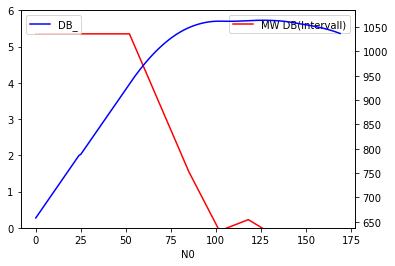

In [113]:
ax = df.plot(kind = "line", 
        x = "N0", 
        y = "MW DB(Intervall)", 
        ylim = (0,int(max(MWDB)*1.2)),
        color = "red")
ax2= ax.twinx()
df.plot(kind = "line", 
        x = "N0", 
        y = "DB_", 
        color = "blue",
        ax = ax2)


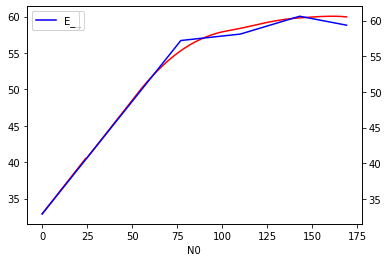

In [114]:
ax= df.plot(kind = "line", 
        x = "N0", 
        y = "E__", 
        color = "red")
ax2= ax.twinx()
ax2 = df.plot(kind = "line", 
        x = "N0", 
        y = "E_", 
        color = "blue",
        ax = ax2)
